# Analysis of cardiovascular diseases 

In this notebook, we will load the dataset which can be found at https://www.kaggle.com/sulianova/cardiovascular-disease-dataset and we will do necessary preprocessing 



In [17]:
# importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("/home/sankethbk7777/Analysis of Cardio Vascular diseases/cardio_train.csv", delimiter=";")

In [3]:
# shape of data set 

print(F"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Dataset has 70000 rows and 13 columns


In [4]:
print("FIrst 5 rows of dataset")

data.head()

FIrst 5 rows of dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# Types of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Brief description of each column

(These are current status of columns we may change some of them later)

 #### Numeric Columns 
 - id (discrete) : number
 - age (continuous) : in days 
 - height (continuous) : in cm 
 - weight (continuous) : in kg 
 - ap_hi (continuous) : systolic blood pressure (mm/Hg)
 - ap_lo : Diastolic blood pressure (mm/Hg)
 
 
 
 #### Categorical columns    
 - gender (nominal) :
     - 1 : women 
     - 2 : men 
 - cholestrol (ordinal):
      - 1 : normal 
      - 2 : above normal
      - 3 : well above normal  
 - gluc (ordinal): glucose level 
      - 1 : normal 
      - 2 : above normal
      - 3 : well above normal 
 - alco (binary) :
      - 0 : does not consume alcohol 
      - 1 : consumes alcohol 
 - active (binary) : exercise/obesity 
      - 0 : No exercise 
      - 1 : exercise 
 - cardio (binary) : 
      - 0 : Has cardiovascular diseases 
      - 1 : No CVD 

### Checking for null values

In [6]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Our dataset has no missing values.

### Checking for duplicated rows

In [7]:
data.duplicated().sum()

0

we don't have duplicate rows 

### We will drop id column as it is not necessary

In [8]:
data.drop(columns="id",inplace=True)

## Detecting Outliers

In [9]:
print("Overall summary of numerical columns")
data.describe()

Overall summary of numerical columns


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### we will examine each variable for outliers

 It would be easier to analyze the graphs if we standardize the values


If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [12]:
print(F"minimum weight = {data['weight'].min()} kg ")
print(F"minimum height = {data['height'].min()} cm")


minimum weight = 10.0 kg 
minimum height = 55 cm


### We will plot boxplot to visualize outliers

Since some columns have very high range of values converting them into standard values 
z = (x - mean) / variance 
can result in better boxplots

We suspect some some numerical columns to have outliers we will confirm it by plotting boxplots


In [33]:


x = data.copy(deep=True)


s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]

def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 

x_std=standartization(x)
print("melted dataset")
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0


In [34]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted

,cardio,features,value
0,0,age,-0.436058
1,1,age,0.307684
2,1,age,-0.247995
3,1,age,-0.748147
4,0,age,-0.808538
...,...,...,...
349995,0,ap_lo,-0.088238
349996,1,ap_lo,-0.035180
349997,1,ap_lo,-0.035180
349998,1,ap_lo,-0.088238


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

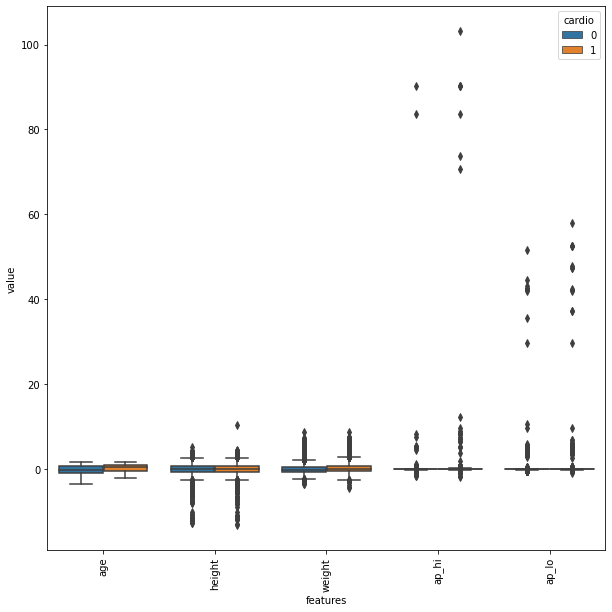

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
plt.xticks(rotation=90)

Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [56]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

print(data.shape)

(54889, 12)


In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure

In [61]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 870 cases


In [65]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

print(data.shape)

(51925, 12)
